In [17]:
import geopandas as gpd
import pandas as pd
import os
path1 = "/Users/qilinzhou/Desktop/PreK Visualization/Result"
path2 = "/Users/qilinzhou/Desktop/PreK Enrollment&Funding/Result"


In [28]:
os.chdir(path1)
geo_preschool_assess = pd.read_csv("geospatial_preK_assessment.csv", keep_default_na=False)

In [29]:
geo_preschool_assess.head()

,State,RequiredAssessmentforpreK,Year,STUSPS,state_fips,REGION,DIVISION,STATEFP,STATENS,GEOID,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,ALABAMA,Multiple Assessments,2007-01-01,AL,1,3,6,1,1779775,1,Alabama,0,G4000,A,131175460655,4591915034,32.739632,-86.843459,"POLYGON ((-88.139988 34.581703, -88.139969 34...."
1,ALABAMA,Required assessment instruments are determined...,2008-01-01,AL,1,3,6,1,1779775,1,Alabama,0,G4000,A,131175460655,4591915034,32.739632,-86.843459,"POLYGON ((-88.139988 34.581703, -88.139969 34...."
2,ALABAMA,Multiple Assessments,2009-01-01,AL,1,3,6,1,1779775,1,Alabama,0,G4000,A,131175460655,4591915034,32.739632,-86.843459,"POLYGON ((-88.139988 34.581703, -88.139969 34...."
3,ALABAMA,Multiple Assessments,2010-01-01,AL,1,3,6,1,1779775,1,Alabama,0,G4000,A,131175460655,4591915034,32.739632,-86.843459,"POLYGON ((-88.139988 34.581703, -88.139969 34...."
4,ALABAMA,Multiple Assessments,2011-01-01,AL,1,3,6,1,1779775,1,Alabama,0,G4000,A,131175460655,4591915034,32.739632,-86.843459,"POLYGON ((-88.139988 34.581703, -88.139969 34...."


In [30]:
geo_preschool_assess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      714 non-null    object 
 1   RequiredAssessmentforpreK  714 non-null    object 
 2   Year                       714 non-null    object 
 3   STUSPS                     714 non-null    object 
 4   state_fips                 714 non-null    int64  
 5   REGION                     714 non-null    int64  
 6   DIVISION                   714 non-null    int64  
 7   STATEFP                    714 non-null    int64  
 8   STATENS                    714 non-null    int64  
 9   GEOID                      714 non-null    int64  
 10  NAME                       714 non-null    object 
 11  LSAD                       714 non-null    int64  
 12  MTFCC                      714 non-null    object 
 13  FUNCSTAT                   714 non-null    object 

In [31]:
geo_preschool_assess.Year = geo_preschool_assess.Year.astype('datetime64[ns]')

In [32]:
geo_preschool_assess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   State                      714 non-null    object        
 1   RequiredAssessmentforpreK  714 non-null    object        
 2   Year                       714 non-null    datetime64[ns]
 3   STUSPS                     714 non-null    object        
 4   state_fips                 714 non-null    int64         
 5   REGION                     714 non-null    int64         
 6   DIVISION                   714 non-null    int64         
 7   STATEFP                    714 non-null    int64         
 8   STATENS                    714 non-null    int64         
 9   GEOID                      714 non-null    int64         
 10  NAME                       714 non-null    object        
 11  LSAD                       714 non-null    int64         
 12  MTFCC   

In [33]:
os.chdir(path2)
prek_enroll_fund = pd.read_csv("2007_2020_enroll_fund.csv", keep_default_na=False)

In [34]:
# Now convert the 'Year' column to datetime format with January 1st as the default date
prek_enroll_fund['Year'] = pd.to_datetime(prek_enroll_fund['Year'], format='%Y')

In [35]:
prek_enroll_fund.head()

,Year,STATE,PreK Enrollment,Reported Spending Per Child in PreK
0,2007-01-01,Oklahoma,34375,6731
1,2007-01-01,New Jersey,45499,10494
2,2007-01-01,Connecticut,8532,9577
3,2007-01-01,Florida,124390,2335
4,2007-01-01,Iowa,2033,8966


In [36]:
prek_enroll_fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Year                                 709 non-null    datetime64[ns]
 1   STATE                                709 non-null    object        
 2   PreK Enrollment                      709 non-null    int64         
 3   Reported Spending Per Child in PreK  709 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 22.3+ KB


In [37]:
# Applying the condition
prek_enroll_fund.loc[prek_enroll_fund["STATE"] == "D.C.", "STATE"] = "District of Columbia"

In [38]:
geo_preschool_assess['State_lower'] = geo_preschool_assess['State'].str.lower()
prek_enroll_fund['STATE_lower'] = prek_enroll_fund['STATE'].str.lower()
prek_enroll_fund.rename(columns={"STATE_lower": "State_lower"}, inplace=True)

In [39]:
prek_enroll_fund

,Year,STATE,PreK Enrollment,Reported Spending Per Child in PreK,State_lower
0,2007-01-01,Oklahoma,34375,6731,oklahoma
1,2007-01-01,New Jersey,45499,10494,new jersey
2,2007-01-01,Connecticut,8532,9577,connecticut
3,2007-01-01,Florida,124390,2335,florida
4,2007-01-01,Iowa,2033,8966,iowa
...,...,...,...,...,...
704,2020-01-01,Indiana,0,0,indiana
705,2020-01-01,Montana,0,0,montana
706,2020-01-01,New Hampshire,0,0,new hampshire
707,2020-01-01,South Dakota,0,0,south dakota


In [40]:
prek_assess_social = geo_preschool_assess.merge(prek_enroll_fund, on = ['Year', 'State_lower'],
                   how = 'outer')

In [41]:
prek_assess_social

,State,RequiredAssessmentforpreK,Year,STUSPS,state_fips,REGION,DIVISION,STATEFP,STATENS,GEOID,...,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,State_lower,STATE,PreK Enrollment,Reported Spending Per Child in PreK
0,ALABAMA,Multiple Assessments,2007-01-01,AL,1,3,6,1,1779775,1,...,A,131175460655,4591915034,32.739632,-86.843459,"POLYGON ((-88.139988 34.581703, -88.139969 34....",alabama,Alabama,1062.0,6931.0
1,ALABAMA,Required assessment instruments are determined...,2008-01-01,AL,1,3,6,1,1779775,1,...,A,131175460655,4591915034,32.739632,-86.843459,"POLYGON ((-88.139988 34.581703, -88.139969 34....",alabama,Alabama,2265.0,4415.0
2,ALABAMA,Multiple Assessments,2009-01-01,AL,1,3,6,1,1779775,1,...,A,131175460655,4591915034,32.739632,-86.843459,"POLYGON ((-88.139988 34.581703, -88.139969 34....",alabama,Alabama,3384.0,5134.0
3,ALABAMA,Multiple Assessments,2010-01-01,AL,1,3,6,1,1779775,1,...,A,131175460655,4591915034,32.739632,-86.843459,"POLYGON ((-88.139988 34.581703, -88.139969 34....",alabama,Alabama,3870.0,4544.0
4,ALABAMA,Multiple Assessments,2011-01-01,AL,1,3,6,1,1779775,1,...,A,131175460655,4591915034,32.739632,-86.843459,"POLYGON ((-88.139988 34.581703, -88.139969 34....",alabama,Alabama,3870.0,5680.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,WYOMING,NA,2016-01-01,WY,56,4,8,56,1779807,56,...,A,251458712277,1867503715,42.989659,-107.544392,"POLYGON ((-111.044893 43.315719, -111.044941 4...",wyoming,Wyoming,0.0,0.0
710,WYOMING,NA,2017-01-01,WY,56,4,8,56,1779807,56,...,A,251458712277,1867503715,42.989659,-107.544392,"POLYGON ((-111.044893 43.315719, -111.044941 4...",wyoming,Wyoming,0.0,0.0
711,WYOMING,NA,2018-01-01,WY,56,4,8,56,1779807,56,...,A,251458712277,1867503715,42.989659,-107.544392,"POLYGON ((-111.044893 43.315719, -111.044941 4...",wyoming,Wyoming,0.0,0.0
712,WYOMING,NA,2019-01-01,WY,56,4,8,56,1779807,56,...,A,251458712277,1867503715,42.989659,-107.544392,"POLYGON ((-111.044893 43.315719, -111.044941 4...",wyoming,Wyoming,0.0,0.0


In [42]:
prek_assess_social.drop(columns=['STATE', 'State_lower'], inplace=True)

In [43]:
prek_assess_social.head()

,State,RequiredAssessmentforpreK,Year,STUSPS,state_fips,REGION,DIVISION,STATEFP,STATENS,GEOID,...,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,PreK Enrollment,Reported Spending Per Child in PreK
0,ALABAMA,Multiple Assessments,2007-01-01,AL,1,3,6,1,1779775,1,...,0,G4000,A,131175460655,4591915034,32.739632,-86.843459,"POLYGON ((-88.139988 34.581703, -88.139969 34....",1062.0,6931.0
1,ALABAMA,Required assessment instruments are determined...,2008-01-01,AL,1,3,6,1,1779775,1,...,0,G4000,A,131175460655,4591915034,32.739632,-86.843459,"POLYGON ((-88.139988 34.581703, -88.139969 34....",2265.0,4415.0
2,ALABAMA,Multiple Assessments,2009-01-01,AL,1,3,6,1,1779775,1,...,0,G4000,A,131175460655,4591915034,32.739632,-86.843459,"POLYGON ((-88.139988 34.581703, -88.139969 34....",3384.0,5134.0
3,ALABAMA,Multiple Assessments,2010-01-01,AL,1,3,6,1,1779775,1,...,0,G4000,A,131175460655,4591915034,32.739632,-86.843459,"POLYGON ((-88.139988 34.581703, -88.139969 34....",3870.0,4544.0
4,ALABAMA,Multiple Assessments,2011-01-01,AL,1,3,6,1,1779775,1,...,0,G4000,A,131175460655,4591915034,32.739632,-86.843459,"POLYGON ((-88.139988 34.581703, -88.139969 34....",3870.0,5680.0


In [44]:
prek_assess_social.to_csv('geospatial_preK_assess_social.csv', index=False)

Text(113.99999999999999, 0.5, 'Year')

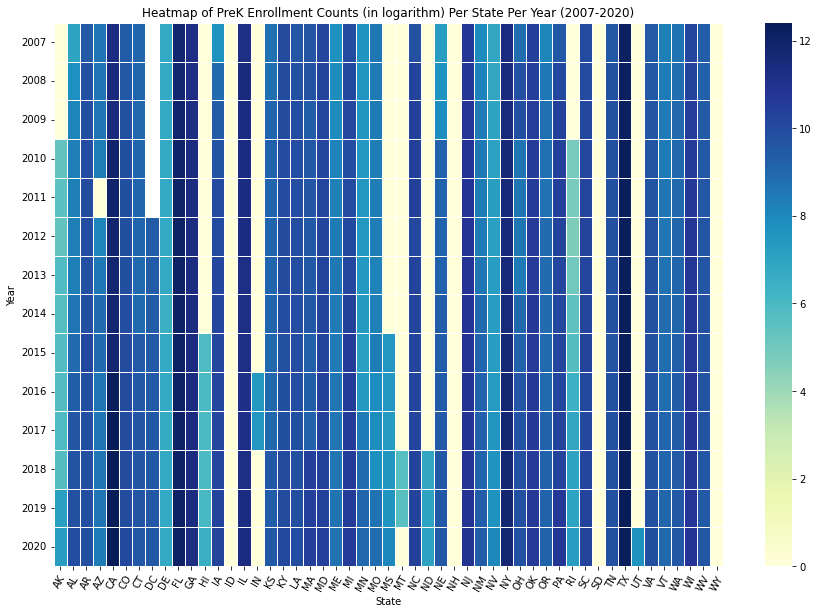

In [75]:
#Preschool Enrollment Analysis
import seaborn as sns
import numpy as np

# Pivot the data to get a matrix of years (rows) and states (columns)
pivot_table = prek_assess_social.pivot(index='Year', columns='STUSPS', values='PreK Enrollment')

plt.figure(figsize=(15, 10))

# Using logarithmic scale for color representation
# Adding a small constant to avoid taking log of zero
sns.heatmap(np.log(pivot_table + 1), cmap="YlGnBu", linewidths=.5)

# Modify axis labels for clarity
plt.xticks(rotation=60, ha='center')

# Extract year part from the date object and use it for y-axis labels
year_labels = [str(year.year) for year in pivot_table.index]
plt.yticks(ticks=np.arange(len(year_labels))+0.5, labels=year_labels, rotation=0)

# Adding titles and labels
plt.title('Heatmap of PreK Enrollment Counts (in logarithm) Per State Per Year (2007-2020)')
plt.xlabel('State')
plt.ylabel('Year')

Text(113.99999999999999, 0.5, 'Year')

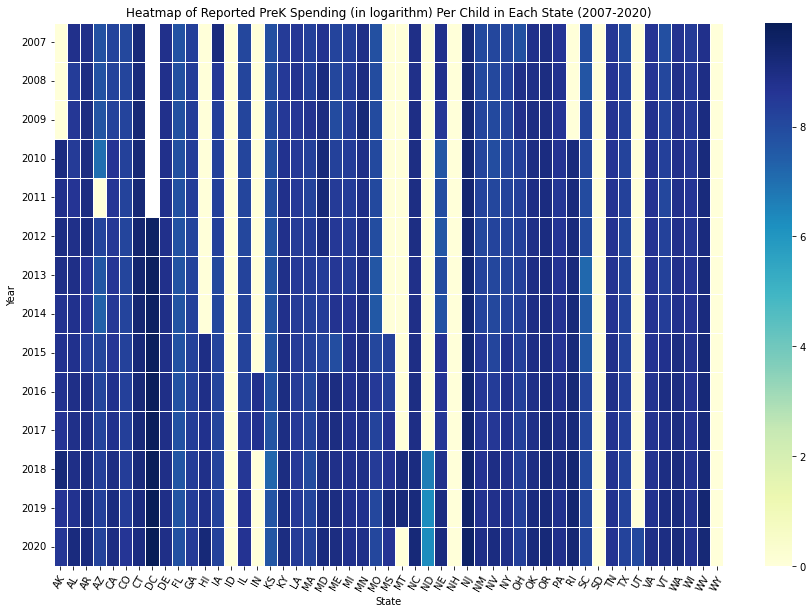

In [76]:
#Preschool Funding Analysis

# Pivot the data to get a matrix of years (rows) and states (columns)
pivot_table = prek_assess_social.pivot(index='Year', columns='STUSPS', values='Reported Spending Per Child in PreK')

plt.figure(figsize=(15, 10))

# Using logarithmic scale for color representation
# Adding a small constant to avoid taking log of zero
sns.heatmap(np.log(pivot_table + 1), cmap="YlGnBu", linewidths=.5)

# Modify axis labels for clarity
plt.xticks(rotation=60, ha='center')

# Extract year part from the date object and use it for y-axis labels
year_labels = [str(year.year) for year in pivot_table.index]
plt.yticks(ticks=np.arange(len(year_labels))+0.5, labels=year_labels, rotation=0)

# Adding titles and labels
plt.title('Heatmap of Reported PreK Spending (in logarithm) Per Child in Each State (2007-2020)')
plt.xlabel('State')
plt.ylabel('Year')